## Acknowledgements
 - Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
 - Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).
 - Datas has been taken from kaggle compitition . https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


In [3]:
# import neccessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings("ignore")



In [4]:
# import data 

true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [5]:

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
false. head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# add category = 1 on true table and category = 0 on false table

true['category'] =1
false['category'] =0

In [8]:
# concate both table 


df = pd.concat([true,false])

df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
# describe df dataset

print("Shape of df :",df.shape)

print("\nDistinct value of category feature and total values")
df['category'].value_counts()

Shape of df : (44898, 5)

Distinct value of category feature and total values


0    23481
1    21417
Name: category, dtype: int64

In [10]:
# check null values

df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [14]:
# check distinct values of subject feature

df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [17]:
# added all features text , subject,title

df['text'] = df['text'] + " " + df['title'] + " " + df['subject']

df['text'].loc[0]

0    WASHINGTON (Reuters) - The head of a conservat...
0    Donald Trump just couldn t wish all Americans ...
Name: text, dtype: object

In [25]:
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_colwidth",-1) # for display whole text

In [28]:
# check properly text feature for concate 
df['text'].loc[0]

0    WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support ed

In [29]:
# delete other columns

del df['title']
del df['date']
del df['subject']

In [31]:
# check again df dataset

df.head(1)

text  \
0  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to 

In [38]:
# import necessary function ,class for string manupulation

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string


In [40]:
# adding single set of string punctuation and stopwords english


stop  = set(stopwords.words("english"))
punctuation = list(string.punctuation)

stop.update(punctuation)

stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [41]:
# remove same meaning word by PorterStemmer

ps = PorterStemmer()

def stem_text(text):
    final_text =[]
    for w in text.split():
        if w.strip().lower() not in stop:
            word = ps.stem(w.strip())
            final_text.append(word)
    return " ".join(final_text)

In [44]:
# apply stem_text function on df dataframe
df['text'] = df['text'].apply(stem_text)

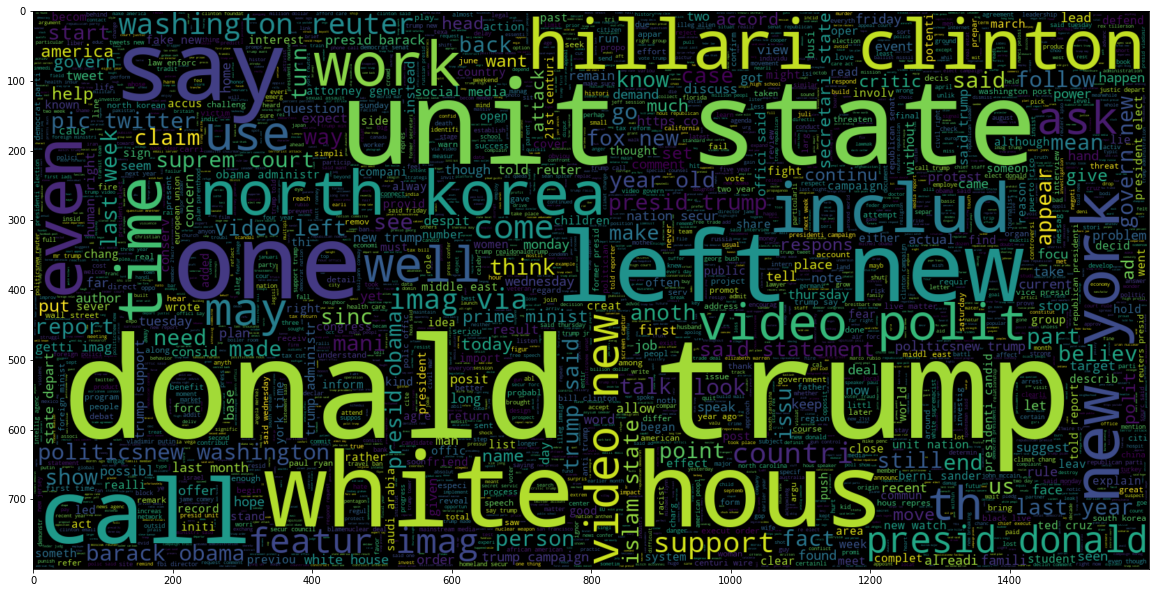

In [51]:
# import WordCloud , STOPWORDS class for visualization

from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (20,20))

wc = WordCloud(max_words=3000,width=1600,height=800,stopwords=STOPWORDS).generate(" ".join(df.text))

plt.imshow(wc,interpolation='bilinear')

In [53]:
# split data train and test 

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train,X_test,y_train,y_test = train_test_split(df.text,df.category,test_size = 0.25)

print("Shape of data ",X_train.shape,X_test.shape)

Shape of data  (33673,) (11225,)


In [55]:
# transformed train reviews

cv = CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))

cv_train_review = cv.fit_transform(X_train)

cv_test_review  = cv.transform(X_test)

In [56]:
# check shape 

print("Shape of Train",cv_train_review.shape)
print("Shape of Train",cv_test_review.shape)

Shape of Train (33673, 1960807)
Shape of Train (11225, 1960807)


In [58]:
print(type(cv_train_review))

<class 'scipy.sparse.csr.csr_matrix'>


In [59]:
cv_train_review.shape[1]

1960807

In [60]:
# built model 

model = Sequential()

model.add(Dense(units =100,activation = 'relu' , input_dim = cv_train_review.shape[1]))
model.add(Dense(units = 50 ,activation ='relu'))
model.add(Dense(units = 25 ,activation ='relu'))
model.add(Dense(units = 10 ,activation ='relu'))
model.add(Dense(units = 1 ,activation ='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [61]:
# compile model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [62]:
# fit model

model.fit(cv_train_review,y_train,epochs=5)


Epoch 1/5
33673/33673 [==============================] - 8617s 256ms/step - loss: 0.6922 - accuracy: 0.5231
Epoch 2/5
33673/33673 [==============================] - 7423s 220ms/step - loss: 0.0970 - accuracy: 0.9701
Epoch 3/5
33673/33673 [==============================] - 6480s 192ms/step - loss: 0.0366 - accuracy: 0.9899
Epoch 4/5
33673/33673 [==============================] - 5916s 176ms/step - loss: 0.0359 - accuracy: 0.9901
Epoch 5/5
33673/33673 [==============================] - 5906s 175ms/step - loss: 0.0360 - accuracy: 0.9901


In [63]:
# prediction 

pred = model.predict(cv_test_review)

In [65]:
# check output 
pred

array([[4.5440823e-02],
       [3.8310885e-04],
       [4.5440823e-02],
       ...,
       [4.2930245e-04],
       [9.9997073e-01],
       [9.9999654e-01]], dtype=float32)

In [72]:
pred[0][0]

0.0

In [68]:
type(y_test)

pandas.core.series.Series

In [69]:
# making thershold 0.5 


for i in range(len(pred)):
    if(pred[i]>0.5):
        pred[i] = 1
    else:
        pred[i] =0

In [70]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [76]:
# evalution of model 


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


print("\nEvalution")
print("----------------\n")

print("Accuracy_score:\n")
print(accuracy_score(pred,y_test))

print("\nConfusion matrics:\n")
print(confusion_matrix(pred,y_test))

print("\nClassification_report:\n")
print(classification_report(pred,y_test))


Evalution
----------------

Accuracy_score:

0.9002227171492205

Confusion matrics:

[[5459  741]
 [ 379 4646]]

Classification_report:

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      6200
         1.0       0.86      0.92      0.89      5025

    accuracy                           0.90     11225
   macro avg       0.90      0.90      0.90     11225
weighted avg       0.90      0.90      0.90     11225



In [77]:
# test single text
cv_test_review

<11225x1960807 sparse matrix of type '<class 'numpy.int64'>'
	with 398438 stored elements in Compressed Sparse Row format>

In [85]:
# test single text
df_test = df['text'].loc[(df['category'] == 1)][0]

In [86]:
df_test

'washington (reuters) head conserv republican faction u.s. congress, vote month huge expans nation debt pay tax cuts, call “fiscal conservative” sunday urg budget restraint 2018. keep sharp pivot way among republicans, u.s. repres mark meadows, speak cbs’ “face nation,” drew hard line feder spending, lawmak brace battl january. return holiday wednesday, lawmak begin tri pass feder budget fight like link issues, immigr policy, even novemb congression elect campaign approach republican seek keep control congress. presid donald trump republican want big budget increas militari spending, democrat also want proport increas non-defens “discretionary” spend program support education, scientif research, infrastructure, public health environment protection. “the (trump) administr alreadi will say: ‘we’r go increas non-defens discretionari spend ... 7 percent,’” meadows, chairman small influenti hous freedom caucus, said program. “now, democrat say that’ enough, need give govern pay rais 10 11 p

In [87]:
# convert countvectorizer
df_test_review = cv.transform(df_test)

ValueError: Iterable over raw text documents expected, string object received.

In [91]:
type(X_test)

pandas.core.series.Series

(11225, 1960807)

In [100]:
cv_test_review.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
cv.get_feature_names()

['00 000',
 '00 0109',
 '00 0700',
 '00 0800',
 '00 16',
 '00 1600',
 '00 1700',
 '00 22',
 '00 afternoon',
 '00 allow',
 '00 also',
 '00 american',
 '00 balanc',
 '00 bedminster',
 '00 campaign',
 '00 charity',
 '00 civilian',
 '00 clock',
 '00 comment',
 '00 day',
 '00 decod',
 '00 delet',
 '00 depart',
 '00 donald',
 '00 east',
 '00 edt',
 '00 email',
 '00 enemi',
 '00 enjoy',
 '00 even',
 '00 final',
 '00 first',
 '00 gallon',
 '00 gave',
 '00 go',
 '00 great',
 '00 immigr',
 '00 instead',
 '00 irfan',
 '00 isra',
 '00 it',
 '00 jobs',
 '00 juli',
 '00 late',
 '00 march',
 '00 meanwhile',
 '00 meet',
 '00 midnight',
 '00 monday',
 '00 move',
 '00 news',
 '00 octob',
 '00 offici',
 '00 one',
 '00 pdt',
 '00 rohingya',
 '00 schedul',
 '00 school',
 '00 spanish',
 '00 spokesman',
 '00 stood',
 '00 swearing',
 '00 then',
 '00 thursday',
 '00 time',
 '00 today',
 '00 town',
 '00 truck',
 '00 trump',
 '00 tuition',
 '00 tweet',
 '00 twitter',
 '00 two',
 '00 unlimit',
 '00 welfar',
 '00 